In [21]:
# MANE 4962 Homework 2 Question 2

import numpy as np
from collections import Counter
from tensorflow.keras.datasets import mnist # Import MNIST
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

training images shapes:  (60000, 28, 28)
testing images shapes:  (10000, 28, 28)
training targets shapes:  (60000,)
testing targers shapes:  (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  

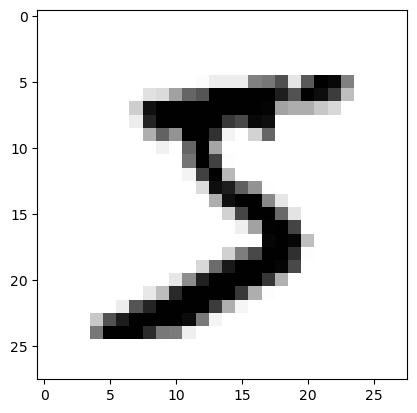

In [22]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("training images shapes: ", X_train.shape)
print("testing images shapes: ", X_test.shape)
print("training targets shapes: ", y_train.shape)
print("testing targers shapes: ", y_test.shape)
plt.imshow(X_train[0], cmap=plt.cm.gray_r, interpolation="nearest")
print(X_train[0])

training images shapes:  (29492, 28, 28)
testing images shapes:  (4926, 28, 28)
training targets shapes:  (29492,)
testing targers shapes:  (4926,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0

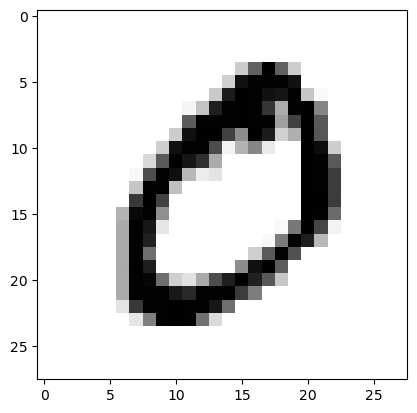

In [23]:
# Sort out the training and test data for only even numbers
"Filtering for even numbers only"
train_even_filter = np.where(y_train % 2 == 0)
test_even_filter = np.where(y_test % 2 == 0)

""" Even Training Data """
X_even_train = X_train[train_even_filter]
y_even_train = y_train[train_even_filter]

""" Even Test Data """
X_even_test = X_test[test_even_filter]
y_even_test = y_test[test_even_filter]

# Verify only even training and test data
print("training images shapes: ", X_even_train.shape)
print("testing images shapes: ", X_even_test.shape)
print("training targets shapes: ", y_even_train.shape)
print("testing targers shapes: ", y_even_test.shape)
plt.imshow(X_even_train[0], cmap=plt.cm.gray_r, interpolation="nearest")
print(X_even_train[0])

In [24]:
# Define Target Values and reconstruct shape matrix to a 2D feature vector
X_even_train_2d = np.reshape(X_even_train, (-1, 28*28))
X_even_test_2d = np.reshape(X_even_test, (-1, 28*28))

# No need to reshape y_test and train data
# y_even_train_2d = np.reshape(y_even_train, (-1,1))
# y_even_test_2d = np.reshape(y_even_test, (-1,1))

# Verify Shapes
print(X_even_train_2d.shape) 
print(X_even_test_2d.shape)
# print(y_even_train_2d.shape) 
# print(y_even_test_2d.shape)

num_target = np.array([0, 2, 4, 6, 8]) # Target Matrix for k-nearest number to identify

(29492, 784)
(4926, 784)


preds: [2 0 4 ... 2 4 6]
actual: [2 0 4 ... 2 4 6]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           2       0.99      0.98      0.99      1032
           4       0.99      0.99      0.99       982
           6       0.99      0.99      0.99       958
           8       0.99      0.97      0.98       974

    accuracy                           0.99      4926
   macro avg       0.99      0.99      0.99      4926
weighted avg       0.99      0.99      0.99      4926



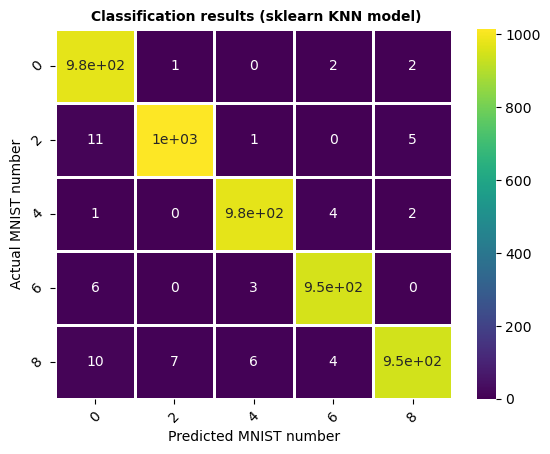

In [25]:
# Construct a k-nearest neighbors machine learning algorithm
from sklearn.neighbors import KNeighborsClassifier
skmodel = KNeighborsClassifier(n_neighbors=3)
skmodel.fit(X_even_train_2d, y_even_train)
print('preds:', skmodel.predict(X_even_test_2d))
print('actual:', y_even_test)
cm_sk = confusion_matrix(y_even_test, skmodel.predict(X_even_test_2d))
ax = sns.heatmap(cm_sk,linewidths=2, annot=True, cmap='viridis', cbar=True);

ax.set_xticklabels(num_target);
ax.set_yticklabels(num_target);
plt.xlabel('Predicted MNIST number');
plt.ylabel('Actual MNIST number');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results (sklearn KNN model)', fontsize='medium', fontweight='bold');
print(classification_report(y_even_test, skmodel.predict(X_even_test_2d)))